In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Domain Specific Dataset Analysis

## 1. Domain: COVID-19 Research Article Abstracts
Source: COVID-19 Open Research Dataset Challenge ([CORD-19](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge)). 

CORD-19 is a resource of over 200,000 scholarly articles, including over 100,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. In this assignment, we will use the abstracts of these articles as a domain sepcific dataset for analysis.

In [4]:
df1 = pd.read_csv('../datasets/CORD19/metadata_sample.csv', dtype=str)
df1.head(2).abstract.values  #sample

array(['OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was most common in infants (32.5%) and pre-school children (22.5%). It occurred year-round but was most common in the fall (35%) and spring (30%). More than three-quarters of patients (77.5%) had comorbidities. Twenty-four isolates (60%) were associated with pneumonia, 14 (35%) with upper respiratory tract infections, and 2 (5%) with bronchiolitis. Cough (82.5%), fever (75%), and malaise (58.8%

### 1a.Tokenization and Stemming

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/shawn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
word_tokens = nltk.word_tokenize(df1.iloc[0].abstract)
'|'.join(word_tokens)

'OBJECTIVE|:|This|retrospective|chart|review|describes|the|epidemiology|and|clinical|features|of|40|patients|with|culture-proven|Mycoplasma|pneumoniae|infections|at|King|Abdulaziz|University|Hospital|,|Jeddah|,|Saudi|Arabia|.|METHODS|:|Patients|with|positive|M.|pneumoniae|cultures|from|respiratory|specimens|from|January|1997|through|December|1998|were|identified|through|the|Microbiology|records|.|Charts|of|patients|were|reviewed|.|RESULTS|:|40|patients|were|identified|,|33|(|82.5|%|)|of|whom|required|admission|.|Most|infections|(|92.5|%|)|were|community-acquired|.|The|infection|affected|all|age|groups|but|was|most|common|in|infants|(|32.5|%|)|and|pre-school|children|(|22.5|%|)|.|It|occurred|year-round|but|was|most|common|in|the|fall|(|35|%|)|and|spring|(|30|%|)|.|More|than|three-quarters|of|patients|(|77.5|%|)|had|comorbidities|.|Twenty-four|isolates|(|60|%|)|were|associated|with|pneumonia|,|14|(|35|%|)|with|upper|respiratory|tract|infections|,|and|2|(|5|%|)|with|bronchiolitis|.|Cough|

In [7]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed = [stemmer.stem(word) for word in word_tokens]
'|'.join(stemmed)

'object|:|this|retrospect|chart|review|describ|the|epidemiolog|and|clinic|featur|of|40|patient|with|culture-proven|mycoplasma|pneumonia|infect|at|king|abdulaziz|univers|hospit|,|jeddah|,|saudi|arabia|.|method|:|patient|with|posit|m.|pneumonia|cultur|from|respiratori|specimen|from|januari|1997|through|decemb|1998|were|identifi|through|the|microbiolog|record|.|chart|of|patient|were|review|.|result|:|40|patient|were|identifi|,|33|(|82.5|%|)|of|whom|requir|admiss|.|most|infect|(|92.5|%|)|were|community-acquir|.|the|infect|affect|all|age|group|but|was|most|common|in|infant|(|32.5|%|)|and|pre-school|children|(|22.5|%|)|.|it|occur|year-round|but|was|most|common|in|the|fall|(|35|%|)|and|spring|(|30|%|)|.|more|than|three-quart|of|patient|(|77.5|%|)|had|comorbid|.|twenty-four|isol|(|60|%|)|were|associ|with|pneumonia|,|14|(|35|%|)|with|upper|respiratori|tract|infect|,|and|2|(|5|%|)|with|bronchiol|.|cough|(|82.5|%|)|,|fever|(|75|%|)|,|and|malais|(|58.8|%|)|were|the|most|common|symptom|,|and|crepit

In [8]:
def analyse_stem(stemmer, original_):
  length_dist_original = []
  length_dist_stemmed = []
  for original in original_:
    original = nltk.word_tokenize(original)
    stemmed = [stemmer.stem(word) for word in original]
    #print("Number of distinct tokens for original", len(set(original)))
    #print("Number of distinct tokens for stemmed", len(set(stemmed)))
    length_dist_original.extend([len(word) for word in original])
    length_dist_stemmed.extend([len(word) for word in stemmed])

  print("Original Average:", sum(length_dist_original)/len(length_dist_original))
  print("Stemmed Average:", sum(length_dist_stemmed)/len(length_dist_stemmed))

  plt.hist(length_dist_original, bins=20, alpha=0.5, label='original')
  plt.hist(length_dist_stemmed, bins=20, alpha=0.5, label='stemmed')
  plt.legend()
  plt.xlabel('Length of a token in number of characters')
  plt.ylabel('Number of tokens')   
  plt.title('Effect of stemming on CORD-19 tokens')

In [9]:
all_tokens=[]
for index, row in df1.iterrows():
  all_tokens.append(row.abstract)

Original Average: 5.203850210970464
Stemmed Average: 4.453059071729958


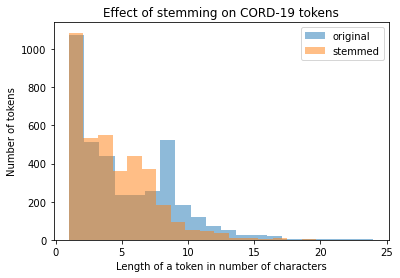

In [10]:
analyse_stem(stemmer, all_tokens)

### 1b. Sentence Segmentation

In [11]:
sent_tokens = nltk.sent_tokenize(df1.iloc[0].abstract)

In [12]:
[len(nltk.word_tokenize(sent_token)) for sent_token in sent_tokens]

[31, 24, 6, 17, 9, 24, 21, 12, 31, 43, 18, 22, 50, 13, 37]

### 1c. POS Tagging

In [13]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shawn/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [14]:
word_tokens = nltk.word_tokenize(sent_tokens[0])
nltk.pos_tag(word_tokens)

[('OBJECTIVE', 'NN'),
 (':', ':'),
 ('This', 'DT'),
 ('retrospective', 'JJ'),
 ('chart', 'NN'),
 ('review', 'NN'),
 ('describes', 'VBZ'),
 ('the', 'DT'),
 ('epidemiology', 'NN'),
 ('and', 'CC'),
 ('clinical', 'JJ'),
 ('features', 'NNS'),
 ('of', 'IN'),
 ('40', 'CD'),
 ('patients', 'NNS'),
 ('with', 'IN'),
 ('culture-proven', 'JJ'),
 ('Mycoplasma', 'NNP'),
 ('pneumoniae', 'NN'),
 ('infections', 'NNS'),
 ('at', 'IN'),
 ('King', 'NNP'),
 ('Abdulaziz', 'NNP'),
 ('University', 'NNP'),
 ('Hospital', 'NNP'),
 (',', ','),
 ('Jeddah', 'NNP'),
 (',', ','),
 ('Saudi', 'NNP'),
 ('Arabia', 'NNP'),
 ('.', '.')]

##2. Domain: Wikipedia Math Equations

 Source: AsciiMath Equations Collected From Wikipedia. The [dataset](https://www.kaggle.com/finalepoch/asciimath-equations-collected-from-wikipedia) contains collection of simple equations written in AsciiMath. 

In [15]:
df2 = pd.read_csv("../datasets/asciimath/math_eqn.csv", dtype=str)

In [16]:
df2.head(5)

,Math_Eqns
0,e^{2}\frac{b_0-\sin v}{R}
1,"f_N, f_{N+1},f_{N+2},\ldots"
2,"\textstyle{\sum_{n=1}^\infty f_n(x,\phi,\psi)}"
3,\underset{n\to\infty}{\mathrm{unif\ lim}}f_n = f
4,"x\in E, m\geq N,n\geq N\implies |f_m(x)-f_n(x)..."


### 2a. Tokenization and Stemming

In [17]:
df2.Math_Eqns.values[4]

'x\\in E, m\\geq N,n\\geq N\\implies |f_m(x)-f_n(x)|&lt;\\epsilon'

In [18]:
word_tokens = nltk.word_tokenize(df2.Math_Eqns.values[4])
"   ".join(word_tokens)

'x\\in   E   ,   m\\geq   N   ,   n\\geq   N\\implies   |f_m   (   x   )   -f_n   (   x   )   |   &   lt   ;   \\epsilon'

In [19]:
all_tokens=[]
for index, row in df2.iterrows():
  all_tokens.append(row.Math_Eqns)

Original Average: 2.6276923076923078
Stemmed Average: 2.606153846153846


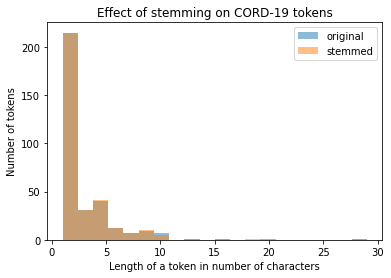

In [20]:
analyse_stem(stemmer, all_tokens)

### 2b. Sentence Segmentation

In [22]:
sent_tokens = nltk.sent_tokenize(df2.iloc[0].Math_Eqns)

In [23]:
[len(nltk.word_tokenize(sent_token)) for sent_token in sent_tokens]

[12]

### 2c. POS Tagging

In [24]:
nltk.sent_tokenize(df1.iloc[8].abstract)[0]

'Heme oxygenase-1 (HO-1), an inducible stress protein, confers cytoprotection against oxidative stress in vitro and in vivo.'

In [25]:
nltk.sent_tokenize(df2.iloc[17].Math_Eqns)[0]

'd_i := \\min\\{\\|x_0 - \\frac{k_i}{i}|,\\ |x_0 - \\frac{(k_i + 1)}{i}| \\}'

In [26]:
word_tokens = nltk.word_tokenize(nltk.sent_tokenize(df2.iloc[17].Math_Eqns)[0])
nltk.pos_tag(word_tokens)

[('d_i', 'NN'),
 (':', ':'),
 ('=', 'JJ'),
 ('\\min\\', 'NNP'),
 ('{', '('),
 ('\\|x_0', 'SYM'),
 ('-', ':'),
 ('\\frac', 'NN'),
 ('{', '('),
 ('k_i', 'VB'),
 ('}', ')'),
 ('{', '('),
 ('i', 'JJ'),
 ('}', ')'),
 ('|', 'NN'),
 (',', ','),
 ('\\', 'NNP'),
 ('|x_0', 'NNP'),
 ('-', ':'),
 ('\\frac', 'NN'),
 ('{', '('),
 ('(', '('),
 ('k_i', 'VB'),
 ('+', 'RB'),
 ('1', 'CD'),
 (')', ')'),
 ('}', ')'),
 ('{', '('),
 ('i', 'JJ'),
 ('}', ')'),
 ('|', 'VBP'),
 ('\\', 'JJ'),
 ('}', ')')]

## 3. Domain: World Financial News

In [41]:
financial_tweets = pd.read_csv('../datasets/financialtweets/stockerbot-export.csv', dtype=str,warn_bad_lines=True, error_bad_lines=False)

b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 fields, saw 17\nSkipping line 4087: expected 8 fields, saw 17\nSkipping line 4088: expected 8 fields, saw 17\nSkipping line 4499: expected 8 fields, saw 12\n'


In [42]:
df3 = financial_tweets['text'].head(150)
df3

0      VIDEO: “I was in my office. I was minding my o...
1      The price of lumber $LB_F is down 22% since hi...
2      Who says the American Dream is dead? https://t...
3      Barry Silbert is extremely optimistic on bitco...
4      How satellites avoid attacks and space junk wh...
                             ...                        
145    Mettler-Toledo International $MTD &amp; Quante...
146    RT @beep_eminent: $EMN Eminent Token FUEL for ...
147    RT @beep_eminent: The $EMN EMINENT token which...
148    Head-To-Head Comparison: Quanterix $QTRX vs. M...
149    Nuance Communications $NUAN Upgraded by ValuEn...
Name: text, Length: 150, dtype: object

### 3a. Tokenization and Stemming

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/shawn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
word_tokens = []
for i in range(df3.shape[0]):
  word_tokens = word_tokens + nltk.word_tokenize(df3[i])
"|".join(word_tokens)

"VIDEO|:|“|I|was|in|my|office|.|I|was|minding|my|own|business|...|”|–David|Solomon|tells|$|GS|interns|how|he|learned|he|wa…|https|:|//t.co/QClAITywXV|The|price|of|lumber|$|LB_F|is|down|22|%|since|hitting|its|YTD|highs|.|The|Macy|'s|$|M|turnaround|is|still|happening.…|https|:|//t.co/XnKsV4De39|Who|says|the|American|Dream|is|dead|?|https|:|//t.co/CRgx19x7sA|Barry|Silbert|is|extremely|optimistic|on|bitcoin|--|but|predicts|that|99|%|of|new|crypto|entrants|are|“|going|to|zero…|https|:|//t.co/mGMVo2cZgY|How|satellites|avoid|attacks|and|space|junk|while|circling|the|Earth|https|:|//t.co/aHzIV3Lqp5|#|paid|@|Oracle|https|:|//t.co/kacpqZWiDJ|.|@|RealMoney|'s|David|Butler|'s|favorite|FANG|stock|is|n't|#|RealMoneySOD|Alphabet|but|Facebook|https|:|//t.co/MczAPSFjOi|Don|’|t|miss|my|convo|with|one|of|my|favorite|thinkers|@|SamHarrisOrg|!|https|:|//t.co/uuPVxIobCh|U.S.|intelligence|documents|on|Nelson|Mandela|made|public|https|:|//t.co/XTnEfo1rO6|https|:|//t.co/V8DXkWDQ6R|Senate|wants|emergency|alerts

In [31]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
stemmed = [stemmer.stem(word) for word in word_tokens]
'|'.join(stemmed)

"video|:|“|i|was|in|my|offic|.|i|was|mind|my|own|busi|...|”|–david|solomon|tell|$|gs|intern|how|he|learn|he|wa…|https|:|//t.co/qclaitywxv|the|price|of|lumber|$|lb_f|is|down|22|%|sinc|hit|it|ytd|high|.|the|maci|'s|$|m|turnaround|is|still|happening.…|https|:|//t.co/xnksv4de39|who|say|the|american|dream|is|dead|?|https|:|//t.co/crgx19x7sa|barri|silbert|is|extrem|optimist|on|bitcoin|--|but|predict|that|99|%|of|new|crypto|entrant|are|“|go|to|zero…|https|:|//t.co/mgmvo2czgi|how|satellit|avoid|attack|and|space|junk|while|circl|the|earth|https|:|//t.co/ahziv3lqp5|#|paid|@|oracl|https|:|//t.co/kacpqzwidj|.|@|realmoney|'s|david|butler|'s|favorit|fang|stock|is|n't|#|realmoneysod|alphabet|but|facebook|https|:|//t.co/mczapsfjoi|don|’|t|miss|my|convo|with|one|of|my|favorit|thinker|@|samharrisorg|!|https|:|//t.co/uupvxiobch|u.s.|intellig|document|on|nelson|mandela|made|public|https|:|//t.co/xtnefo1ro6|https|:|//t.co/v8dxkwdq6r|senat|want|emerg|alert|to|go|out|through|netflix|spotifi|etc|.|https|:|//t

In [32]:
def analyse_stem(stemmer, original_):
  length_dist_original = []
  length_dist_stemmed = []
  for original in original_:
    original = nltk.word_tokenize(original)
    stemmed = [stemmer.stem(word) for word in original]
    #print("Number of distinct tokens for original", len(set(original)))
    #print("Number of distinct tokens for stemmed", len(set(stemmed)))
    length_dist_original.extend([len(word) for word in original])
    length_dist_stemmed.extend([len(word) for word in stemmed])

  print("Original Average:", sum(length_dist_original)/len(length_dist_original))
  print("Stemmed Average:", sum(length_dist_stemmed)/len(length_dist_stemmed))

  plt.hist(length_dist_original, bins=20, alpha=0.5, label='original')
  plt.hist(length_dist_stemmed, bins=20, alpha=0.5, label='stemmed')
  plt.legend()
  plt.xlabel('Length of a token in number of characters')
  plt.ylabel('Number of tokens')   
  plt.title('Effect of stemming on Finance Tweets tokens')

Original Average: 4.148849402854646
Stemmed Average: 3.888435770463152


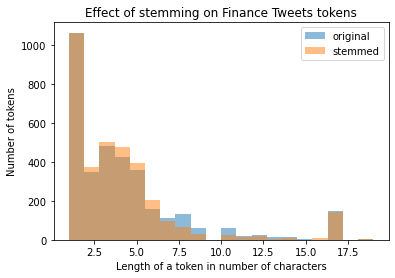

In [33]:
analyse_stem(stemmer, word_tokens)

### 3b. Sentence Segmentation

In [34]:
sent_tokens = nltk.sent_tokenize(df3.iloc[3])

In [35]:
[len(nltk.word_tokenize(sent_token)) for sent_token in sent_tokens]

[25]

### 3c. POS Tagging

In [36]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/shawn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
word_tokens = nltk.word_tokenize(sent_tokens[0])
nltk.pos_tag(word_tokens)

[('Barry', 'NNP'),
 ('Silbert', 'NNP'),
 ('is', 'VBZ'),
 ('extremely', 'RB'),
 ('optimistic', 'JJ'),
 ('on', 'IN'),
 ('bitcoin', 'NN'),
 ('--', ':'),
 ('but', 'CC'),
 ('predicts', 'VBZ'),
 ('that', 'DT'),
 ('99', 'CD'),
 ('%', 'NN'),
 ('of', 'IN'),
 ('new', 'JJ'),
 ('crypto', 'NN'),
 ('entrants', 'NNS'),
 ('are', 'VBP'),
 ('“', 'JJ'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('zero…', 'VB'),
 ('https', 'NN'),
 (':', ':'),
 ('//t.co/mGMVo2cZgY', 'NN')]

##4. Sentence Segmentation Analysis for all 3 datasets

In [38]:
sent_length_1 = []
for index, row in df1.iterrows():
  sent_length_1.extend([len(nltk.word_tokenize(sent_token)) for sent_token in nltk.sent_tokenize(row.abstract)])

In [39]:
sent_length_2 = []
for index, row in df2.iterrows():
  sent_length_2.extend([len(nltk.word_tokenize(sent_token)) for sent_token in nltk.sent_tokenize(row.Math_Eqns)])

In [45]:
sent_length_3 = []
for index, row in financial_tweets.head(20).iterrows():
  sent_length_3.extend([len(nltk.word_tokenize(sent_token)) for sent_token in nltk.sent_tokenize(row.text)])

Dataset 1: 25.62162162162162
Dataset 2: 15.476190476190476
Dataset 3: 27.51063829787234


Text(0.5, 1.0, 'Effect of sentence segmentation on different datasets')

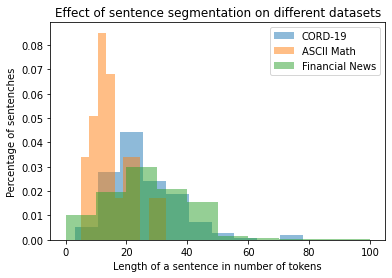

In [ ]:
print("Dataset 1:", sum(sent_length_1)/len(sent_length_1))
print("Dataset 2:", sum(sent_length_2)/len(sent_length_2))
print("Dataset 3:", sum(sent_length_3)/len(sent_length_3))

plt.hist(sent_length_1, bins=10, alpha=0.5, label='CORD-19', density=True)
plt.hist(sent_length_2, bins=10, alpha=0.5, label='ASCII Math', density=True)
plt.hist(sent_length_3, bins=10, alpha=0.5, label='Financial Tweets', density=True, range=[0,100])
plt.legend()
plt.xlabel('Length of a sentence in number of tokens')
plt.ylabel('Percentage of sentenches')   
plt.title('Effect of sentence segmentation on different datasets')